In [1]:
# Imports
import sys
import tensorflow as tf

import cv2
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

/Users/daisy./Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Prepping data
data_dir = '/Users/daisy./Documents/data'

data = tf.keras.utils.image_dataset_from_directory(data_dir)

data = data.map(lambda x, y: (x/255, y))

train_size = int(len(data)* .7)
val_size = int(len(data)* .2)
test_size = int(len(data)* .1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Found 512 files belonging to 2 classes.


In [3]:
# Model Architecture
from functools import partial

tf.random.set_seed(42) 
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")

model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[256, 256, 3]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

/Users/daisy./Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile model
model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 524288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    67,108,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,348,225 (256.91 MB)

 Trainable params: 67,348,225 (256.91 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
logdir = '/Users/daisy./Documents/info 492/logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(train, epochs=4, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/4
11/11 ━━━━━━━━━━━━━━━━━━━━ 111s 10s/step - accuracy: 0.4191 - loss: 32.0506 - val_accuracy: 0.4896 - val_loss: 0.6927
Epoch 2/4
11/11 ━━━━━━━━━━━━━━━━━━━━ 115s 10s/step - accuracy: 0.5308 - loss: 0.6925 - val_accuracy: 0.5938 - val_loss: 0.6950
Epoch 3/4
11/11 ━━━━━━━━━━━━━━━━━━━━ 117s 11s/step - accuracy: 0.5011 - loss: 0.6961 - val_accuracy: 0.4688 - val_loss: 0.6931
Epoch 4/4
11/11 ━━━━━━━━━━━━━━━━━━━━ 124s 11s/step - accuracy: 0.5248 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6930


In [7]:
score = model.evaluate(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3125 - loss: 0.6953


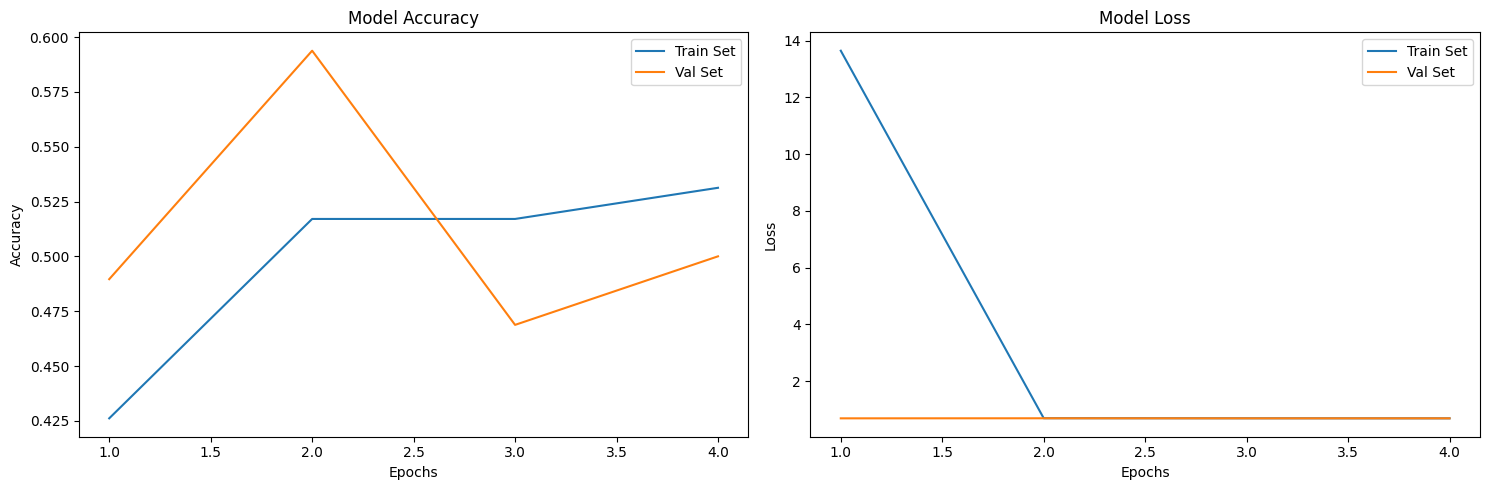

In [8]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs_range = range(1, len(hist.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [22]:
# Load the dataset
data_dir = '/Users/daisy./Documents/data'
dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir)

# Split the dataset into train, validation, and test sets
train_size = int(len(dataset) * 0.7)
val_size = int(len(dataset) * 0.2)
test_size = int(len(dataset) * 0.1)

train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size + val_size).take(test_size)

# Preprocess the data for the Xception model
batch_size = 32
preprocess = tf.keras.applications.xception.preprocess_input

train_set = train.map(lambda x, y: (preprocess(x), y))
# train_set = train_set.shuffle(1000, seed=42).batch(batch_size).prefetch(1)

val_set = val.map(lambda x, y: (preprocess(x), y))
test_set = test.map(lambda x, y: (preprocess(x), y))

Found 512 files belonging to 2 classes.


In [3]:
# using xception
batch_size = 32
preprocess = tf.keras.applications.xception.preprocess_input
train_set = train.map(lambda X, y: (preprocess(tf.cast(X, tf.float32)), y))
train_set = train_set.shuffle(1000, seed=42).batch(batch_size).prefetch(1)
valid_set = val.map(lambda X, y: (preprocess(tf.cast(X, tf.float32)), y)).batch(batch_size)
test_set = test.map(lambda X, y: (preprocess(tf.cast(X, tf.float32)), y)).batch(batch_size)

In [17]:
data_dir = '/Users/daisy./Documents/data'
images, labels = tf.keras.preprocessing.image_dataset_from_directory(data_dir, image_size=(256, 256), batch_size=None)

Found 512 files belonging to 2 classes.


In [23]:
tf.random.set_seed(42)  # extra code – ensures reproducibility

# Define the target height and width
# target_height = 256
# target_width = 256

# # Create the input layer
# inputs = tf.keras.Input(shape=(None, None, 3))  # Dynamic input shape

# # Add the Resizing layer
# x = tf.keras.layers.Resizing(target_height, target_width)(inputs)

inputs = tf.keras.Input(shape=(256, 256, 3))

base_model = tf.keras.applications.xception.Xception(weights="imagenet", include_top=False, input_tensor=inputs)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(1, activation="sigmoid")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

In [15]:
# freezing layers
for layer in base_model.layers:
    layer.trainable = False

In [24]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=4)

Epoch 1/4
 2/11 ━━━━━━━━━━━━━━━━━━━━ 3:04 21s/step - accuracy: 0.6719 - loss: 0.6670